In [51]:
import numpy as np

# Load npz file
data = np.load('caltech-256_features.npz')
# data = np.load('imagenet_features.npz')

# Extract feature and label arrays
X_vit = data['vit_features']
X_clip = data['clip_features']
y = data['labels']

labels = np.unique(y)
num_classes = len(labels) # 257

# Group feature vectors by class label
vit_class = [X_vit[np.where(y == label)[0]] for label in labels]
clip_class = [X_clip[np.where(y == label)[0]] for label in labels]

# Calculate mean vector for each class
vit_mean = [np.mean(g, axis=0) for g in vit_class]
clip_mean = [np.mean(g, axis=0) for g in clip_class]

In [20]:
num_classes

257

In [21]:
center = X_vit.mean(0)
(center * center).sum()

16471.045

In [22]:
(X_vit * X_vit).sum(1).max()

244925.12

In [35]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise distance matrix
# Convert to square distance matrix
vit_distance_matrix = squareform(pdist(vit_mean))
clip_distance_matrix = squareform(pdist(clip_mean))

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarities
vit_similarities = cosine_similarity(vit_mean)
clip_similarities = cosine_similarity(clip_mean)

In [33]:
import json
with open('imagenet_labels.json') as f:
    classes = json.load(f)
print(classes[:10])

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich']


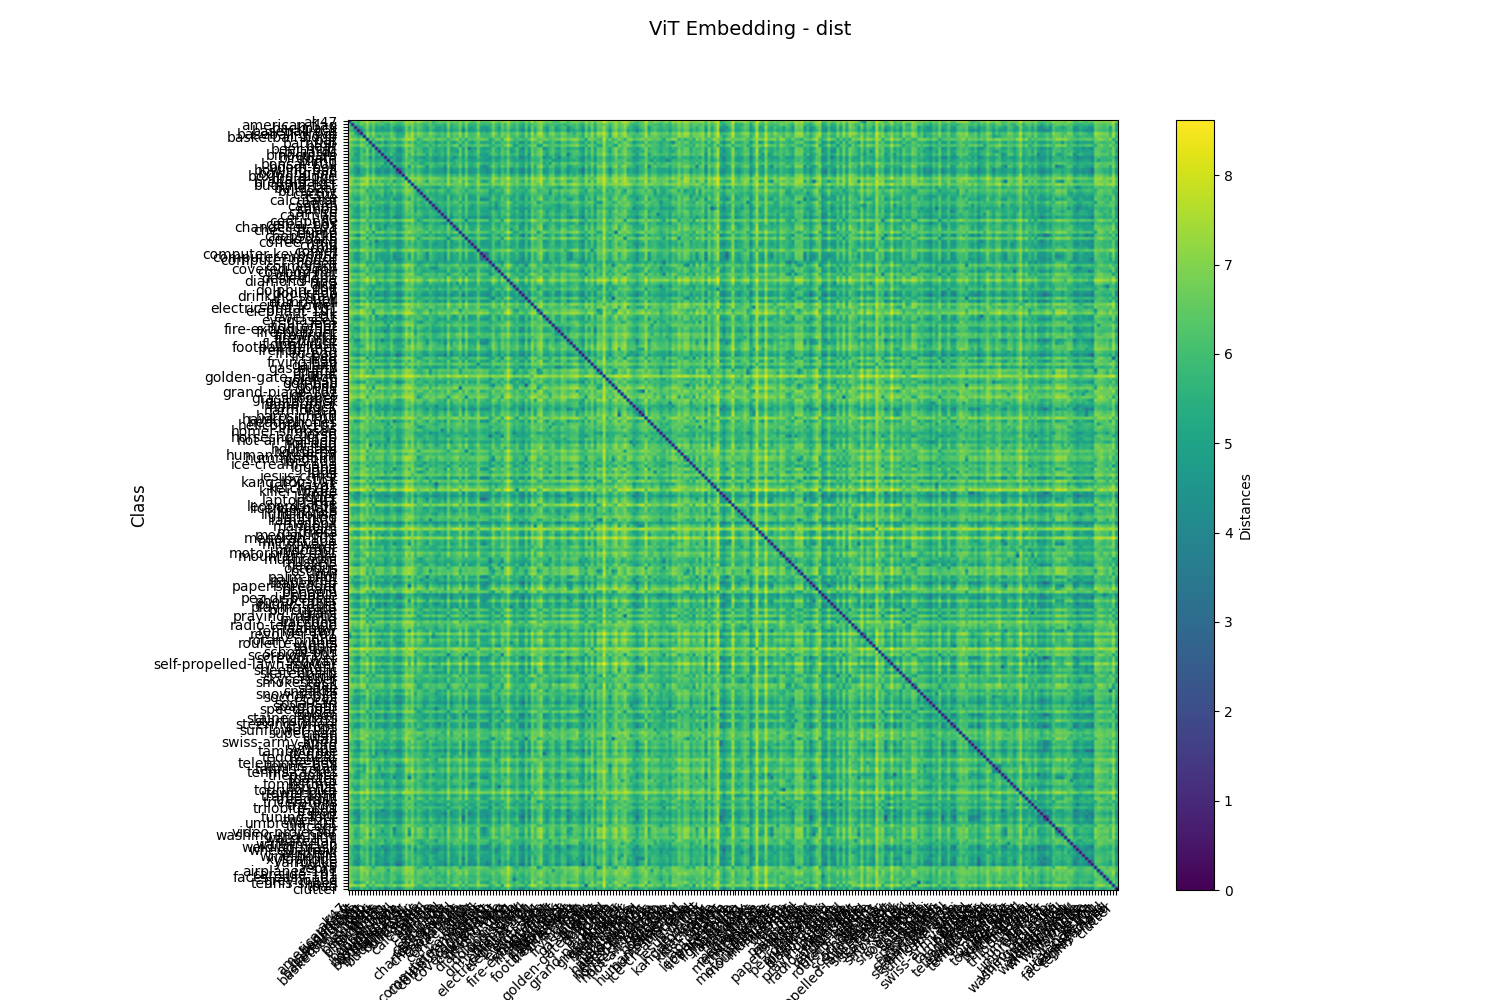

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget

# Load label to class mapping from CSV file
class_labels = pd.read_csv('256_ObjectCategories_map.csv')

# Get the top 5 distances and corresponding class labels for each class
num_top = 5
top_distances = np.argsort(clip_distance_matrix, axis=1)[:, :num_top]
top_labels = np.array([class_labels.iloc[top_distances[i]]['class'].values for i in range(num_classes)])

# Set up plot with larger size
fig, ax = plt.subplots(figsize=(15, 10))

# Plot similarity matrix
im = ax.imshow(clip_distance_matrix)

# Add annotations
cursor = mplcursors.cursor(im)

# Define annotation text
annotations = [[f"{class_labels.iloc[i]['class']}\n{class_labels.iloc[j]['class']}: {clip_distance_matrix[i,j]:.3f}"
                for j in range(num_classes)] for i in range(num_classes)]

# Define annotation position
positions = [(j, i) for i in range(num_classes) for j in range(num_classes)]

# Add annotations to cursor
@cursor.connect("add")
def on_add(sel):
    idx = sel.target.index
    label_i, label_j = class_labels.iloc[positions[idx]].values
    top_dist = top_distances[label_i == class_labels.index][0]
    top_label = top_labels[label_i == class_labels.index][0]
    top_text = '\n'.join([f"{class_labels.loc[i]['class']}: {clip_distance_matrix[label_i,i]:.3f}" for i in top_dist])
    text = f"{label_i}, {label_j}\n\n{top_text}"
    sel.annotation.set(text=text, position=(sel.target.coords[0], sel.target.coords[1]), 
                        ha='left', va='center', fontsize=10)

# Set tick labels
step = 1
ticks = range(num_classes)
ax.set_xticks(ticks[::step])
ax.set_yticks(ticks)
ax.set_xticklabels([class_labels.loc[i]['class'] for i in ticks[::step]], rotation=45, ha='right', fontsize=10)
ax.set_yticklabels([class_labels.loc[i]['class'] for i in ticks], fontsize=10)

# Set axis labels and title
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Class', fontsize=12)
fig.suptitle('ViT Embedding - dist', fontsize=14)

cb = fig.colorbar(im, ax=ax)
cb.set_label('Distances')

plt.show()

In [27]:
clip_distance_matrix.mean(0)

array([6.80283498, 6.10858694, 5.7034919 , 5.36183659, 6.50000435,
       6.24402426, 6.52236176, 5.58849016, 6.23068948, 5.58969084,
       5.7477087 , 5.84661775, 5.22171398, 5.37454676, 6.01377913,
       5.79088292, 5.15544805, 5.14595914, 5.97740002, 6.83369429,
       6.25544391, 6.79079988, 5.74977937, 6.09659589, 5.79961076,
       5.59182135, 5.5945132 , 5.99199635, 5.73721305, 5.2937817 ,
       5.61433832, 5.7435405 , 5.17639004, 6.40271313, 5.42214888,
       5.80839879, 5.98678977, 6.3182503 , 5.34337694, 6.40444795,
       5.44832386, 5.39249116, 5.5798476 , 6.5019912 , 5.57090049,
       5.41637053, 5.35358933, 5.22513761, 6.23286133, 5.73241611,
       5.4701735 , 6.09531863, 6.06178831, 6.90095519, 5.76988378,
       5.42857817, 5.94746988, 5.26913144, 4.91593849, 5.94424595,
       5.22880924, 6.64956592, 6.09068018, 6.2277992 , 6.76508864,
       5.81011762, 5.52280554, 5.85207737, 6.26783787, 5.58462171,
       5.42113545, 6.32366269, 6.15978836, 5.36751892, 5.89698

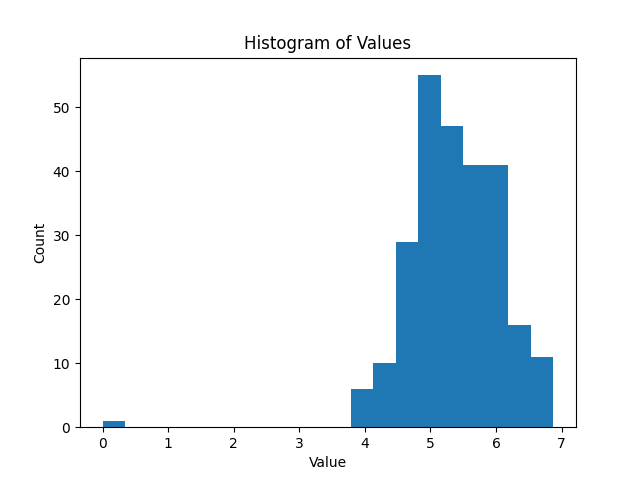

In [34]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots()

# Create the histogram
ax.hist(clip_distance_matrix[13], bins=20)

# Set the axis labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Count')
ax.set_title('Histogram of Values')

plt.savefig('clip_dist_hist.png')

In [18]:
clip_distance_matrix.argmax(0)

array([ 85, 123, 123, 123, 123, 136,  85, 136, 139, 123, 136,  85, 123,
       139, 123, 123,  85, 136, 136,  53, 123, 123, 176, 139, 123, 136,
       123,  53, 136, 176, 123,  85, 123,  85, 123, 123, 136, 181, 123,
        85, 123, 136, 123, 181, 123, 123, 123, 181, 139, 123, 136, 181,
       123, 123, 123, 139, 181, 123, 123, 139, 123, 181, 123,  53, 181,
       123, 123, 139, 139, 123, 136, 136, 128, 123, 123, 136, 128, 123,
       123, 139, 123, 181, 176, 181,  53, 181, 139, 123, 139, 181, 136,
       139, 139, 123, 136, 136, 123, 136, 128, 139, 123, 139, 139,  85,
       136,  85, 139, 136, 136, 123,  85,  85, 139, 139, 136, 139, 123,
        85, 181, 123,  53, 139,  19, 181, 136, 136, 123, 123, 181, 123,
       128, 181, 181,  53, 136, 123, 181, 136, 136, 123, 123, 123, 123,
        85, 123, 176,  85,  85, 123, 181, 181, 139, 123, 176, 123, 123,
       123, 139, 136, 136, 123, 136, 123, 139, 136,  85, 123, 139, 171,
       181, 136,  85, 136, 123, 123, 136, 181, 136,  85, 123, 13

In [30]:
clip_matrix = clip_distance_matrix
vit_matrix = vit_distance_matrix
clip_matrix = clip_similarities
vit_matrix = vit_similarities

# Read the class-to-label mapping from a CSV file with 'id' and 'class' columns
# class_labels = pd.read_csv('256_ObjectCategories_map.csv')

# classes = [str(i) + ":" + class_labels.loc[i]['class'] for i in range(num_classes)]

# Find the indices that would sort each row in ascending order
clip_indices = np.argsort(-clip_matrix, axis=1)
vit_indices = np.argsort(-vit_matrix, axis=1)

# Print the top 5 values, corresponding indices, and class labels for each row
for i in range(clip_distance_matrix.shape[0]):
    print(f"top5 for class {str(i) + ': ' + classes[i]}")
    print(f"\tclip: {[classes[clip_indices[i][j]] for j in range(1,6)]}")
    print(f"\tcosine: {[round(clip_matrix[i,clip_indices[i][j]], 3) for j in range(1,6)]}")
    print(f"\tViT: {[classes[vit_indices[i][j]] for j in range(1,5)]}")
    print(f"\tcosine: {[round(vit_matrix[i,clip_indices[i][j]], 3) for j in range(1,6)]}")

top5 for class 0: tench
	clip: ['Whippet', 'Italian Greyhound', 'crayfish', 'spotted salamander', 'Labrador Retriever']
	cosine: [0.859, 0.764, 0.662, 0.632, 0.616]
	ViT: ['Whippet', 'Newfoundland', 'Italian Greyhound', 'toy terrier']
	cosine: [0.846, 0.737, 0.641, 0.594, 0.608]
top5 for class 1: goldfish
	clip: ['Newfoundland', 'yellow garden spider', 'crane (bird)', 'worm snake', 'Pekingese']
	cosine: [0.625, 0.621, 0.613, 0.591, 0.585]
	ViT: ['Newfoundland', 'toy terrier', 'smooth green snake', 'Whippet']
	cosine: [0.764, 0.504, 0.625, 0.333, 0.575]
top5 for class 2: great white shark
	clip: ['Boxer', 'collie', 'St. Bernard', 'barn spider', 'killer whale']
	cosine: [0.744, 0.744, 0.738, 0.732, 0.73]
	ViT: ['Newfoundland', 'toy terrier', 'smooth green snake', 'Shetland Sheepdog']
	cosine: [0.47, 0.63, 0.581, 0.629, 0.617]
top5 for class 3: tiger shark
	clip: ['banded gecko', 'barn spider', 'hammerhead shark', 'Staffordshire Bull Terrier', 'Border Collie']
	cosine: [0.832, 0.785, 0.78

In [34]:
print(class_labels.columns)

Index(['cid'], dtype='object')
